In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import platform
path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

In [4]:
# 엑셀 데이터를 읽어온다
low = pd.read_excel('./result/low_beef_include.xlsx')
# 엑셀 데이터를 읽어온다
mid = pd.read_excel('./result/mid_beef_include.xlsx')
high =  pd.read_excel('./result/high_beef_include.xlsx')

In [5]:
low.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 2 to 970
Data columns (total 10 columns):
번호           60 non-null int64
식품군          60 non-null object
식품이름         60 non-null object
1회제공량 (g)    60 non-null float64
열량 (kcal)    60 non-null int64
탄수화물 (g)     60 non-null float64
단백질 (g)      60 non-null float64
지방 (g)       60 non-null float64
Error        60 non-null float64
survived     60 non-null bool
dtypes: bool(1), float64(5), int64(2), object(2)
memory usage: 4.7+ KB


In [7]:
for i in low['번호']:
    if i =='\n':
        print(i)

In [8]:
mid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 9 to 966
Data columns (total 10 columns):
번호           37 non-null int64
식품군          37 non-null object
식품이름         37 non-null object
1회제공량 (g)    37 non-null float64
열량 (kcal)    37 non-null int64
탄수화물 (g)     37 non-null float64
단백질 (g)      37 non-null float64
지방 (g)       37 non-null float64
Error        37 non-null float64
survived     37 non-null bool
dtypes: bool(1), float64(5), int64(2), object(2)
memory usage: 2.9+ KB


In [9]:
high.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 921
Data columns (total 10 columns):
번호           31 non-null int64
식품군          31 non-null object
식품이름         31 non-null object
1회제공량 (g)    31 non-null float64
열량 (kcal)    31 non-null int64
탄수화물 (g)     31 non-null float64
단백질 (g)      31 non-null float64
지방 (g)       31 non-null float64
Error        31 non-null float64
survived     31 non-null bool
dtypes: bool(1), float64(5), int64(2), object(2)
memory usage: 2.5+ KB


In [10]:
low['kind'] = 'LOW'
mid['kind'] = 'MID'
high['kind'] = 'LHIGH'

# 중복 데이터를 확인하기 위해 3개의 출력 결과를 합친다

In [ ]:
low = low.reset_index()
del low['index']
mid = mid.reset_index()
del mid['index']
high= high.reset_index()
del high['index']

In [ ]:
sum_table = pd.concat([low, mid, high],sort=False, keys=['HIGH','MID','LOW'])

In [ ]:
sum_table.info()

In [ ]:
sum_table.describe()

In [ ]:
sum_table.head()

In [ ]:
sum_table.index

In [ ]:
sum_table.index.labels[0]

In [ ]:
type(sum_table.index)

In [ ]:
sum_table.head()

In [ ]:
sum_table.to_excel("tmp_check_duplicate_beef.xlsx")

In [ ]:
dup = sum_table.duplicated(["식품이름"])

In [ ]:
type(dup)

In [ ]:
for i,k in enumerate(dup):
    if k:
        print(i)
    else:
        pass

In [ ]:
a = sum_table.index.levels[0].tolist()

In [ ]:
a = np.array(a)

In [ ]:
a = a.astype("str")

In [ ]:
a

In [ ]:
type(sum_table.index.labels[0])

In [ ]:
color_mapping  = np.array(sum_table.index.labels[0].tolist())

In [ ]:
color_mapping = color_mapping.astype('str')

In [ ]:
print(color_mapping)

In [ ]:
reset_index_color = []
for i in color_mapping:
    reset_index_color.append(i)

In [ ]:
g = sns.pairplot(sum_table, palette="husl")

In [ ]:
sum_table.index.

# 방법 2

In [11]:
sum_table = pd.concat([low, mid, high])

In [12]:
sum_table.head()

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),Error,survived,kind
2,2148,육류 및 그 제품,"거위 부산물, 간, 생것",37.593985,50,2.375940,6.154135,1.609023,-1.398496,True,LOW
7,2156,육류 및 그 제품,"고래고기 가공(기타), 붉은살, 염장품",33.112583,50,0.033113,8.079470,2.052980,0.927152,True,LOW
28,2196,육류 및 그 제품,"닭 부산물, 간, 삶은것",29.940120,50,0.260479,7.323353,1.949102,-2.122754,True,LOW
56,2251,육류 및 그 제품,"닭고기, 토종닭, 다리, 생것",41.322314,50,0.371901,7.809917,2.024793,0.950413,True,LOW
77,2289,육류 및 그 제품,"돼지 가공(햄), 등심",39.370079,50,2.322835,6.496063,1.653543,0.157480,True,LOW


In [13]:
cut_data = sum_table.reset_index()
cut_data  = cut_data[['번호', '탄수화물 (g)', '단백질 (g)', '지방 (g)','kind']]
cut_data.head()

,번호,탄수화물 (g),단백질 (g),지방 (g),kind
0,2148,2.375940,6.154135,1.609023,LOW
1,2156,0.033113,8.079470,2.052980,LOW
2,2196,0.260479,7.323353,1.949102,LOW
3,2251,0.371901,7.809917,2.024793,LOW
4,2289,2.322835,6.496063,1.653543,LOW


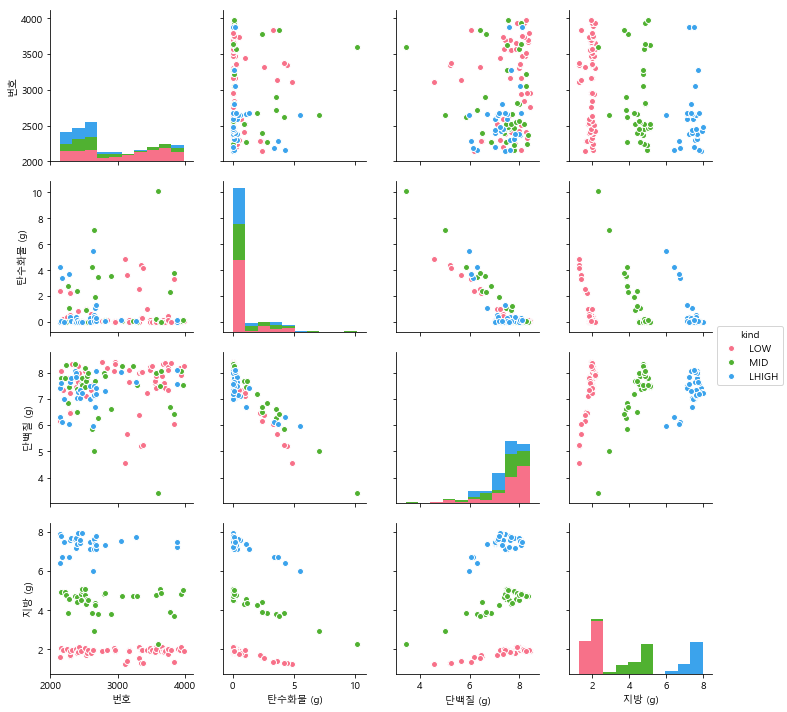

In [16]:
g = sns.pairplot(cut_data, hue = 'kind', palette="husl")